In [79]:
original = []

In [99]:
%run vugrad/experiments/train_mlp.py

## loaded data:
         number of instances: 60000 in training, 10000 in validation
 training class distribution: [32546 27454]
     val. class distribution: [5477 4523]

## Starting training
epoch 000
       accuracy: 0.4523
   running loss: 1.957e+04
epoch 001
       accuracy: 0.9671
   running loss: 6.325e+03
epoch 002
       accuracy: 0.9699
   running loss: 5.214e+03
epoch 003
       accuracy: 0.9798
   running loss: 2.77e+03
epoch 004
       accuracy: 0.9854
   running loss: 2.4e+03
epoch 005
       accuracy: 0.9857
   running loss: 2.146e+03
epoch 006
       accuracy: 0.9884
   running loss: 1.799e+03
epoch 007
       accuracy: 0.9893
   running loss: 1.427e+03
epoch 008
       accuracy: 0.9932
   running loss: 1.354e+03
epoch 009
       accuracy: 0.9938
   running loss: 1.296e+03
epoch 010
       accuracy: 0.9941
   running loss: 1.248e+03
epoch 011
       accuracy: 0.9945
   running loss: 1.21e+03
epoch 012
       accuracy: 0.9947
   running loss: 1.179e+03
epoch 013
       a

In [100]:
original.append(trainloss)

In [ ]:
%run vugrad/experiments/train_mlp.py -D mnist -l 0.0001

In [2]:
sig_onelayer_accuracy = accuracy
sig_onelayer_trainloss = trainloss

In [ ]:
import vugrad as vg
import numpy as np

# Question 5

In [ ]:
a = vg.TensorNode(np.random.randn(2, 2)) 
b = vg.TensorNode(np.random.randn(2, 2)) 

In [ ]:
c = a+b

In [ ]:
c.value

In [ ]:
c.source

In [ ]:
c = vg.TensorNode.__add__(a,b)
c = a+b

In [ ]:
c.source.inputs[0]

In [ ]:
a.grad

### 1) What does $c.value$ contain?

A: A numpy array about the outcome of tensornode operation 

### 2) What does $c.source$ refer to?

A: The Opnode that created this tensor node. In this case, the opnode is "+", the addition of Python Arithmetic Operators

### 3) What does $c.source.inputs[0]$.value refer to?

A: The first input of this Opnode a.k.a. tensornode "a"

### 4) What does $a.grad$ refer to? What is its current value?

A: The place (zero) matrix we will put the gradient when we compute the loss. Current value:

\begin{equation*}
a.grad = \begin{bmatrix}
0 & 0 \\ 0 & 0 
\end{bmatrix}
\end{equation*}

# Question 6

##### 1) An OpNode is defined by its inputs, its outputs and the specific operation it represents (i.e. summation, multiplication). What kind of object defines this operation?

A: From $super()$, we could know it inherit TensorNode. 

-$Op$: operation (forward and backward function), 

-$context$: dictionary for depositing variable during forward/backward (anything we may need to remember for the backward pass), 

-$input/output$: tensornode

##### 2) In the computation graph of question 5, we ultimately added one numpy array to another (albeit wrapped in a lot of other code). In which line of code is the actual addition performed?

A:

```85: other = TensorNode(np.asarray(other)) /leftarrow in TensorNode-__add__```

##### 3) When an OpNode is created, its inputs are immediately set, together with a reference to the op that is being computed. The pointer to the output node(s) is left None at first. Why is this? In which line is the OpNode connected to the output nodes?

A: Making output nodes as None constraint the the output that we expect rather than unprediciable value from other opnodes. 
"self.outputs = None" for definition

```211: outputs = [TensorNode(value=output, source=opnode) for output in outputs_raw] ```


# Question 7

##### Ultimately, this leads to the backward() functions of the relevant Op s being called, which do the actual computation. In which line of the code does this happen?

231: def backward(context : dict, *goutput): 

but the backward formula needs to be called by the Ops

### Question 8

##### the given forward, derive the backward, and show that it matches what is implemented.

Implment of operator: $Expand(Op)$

In [10]:
from vugrad.vugrad.core import Op
import numpy as np
context = {}
class Expand(Op):
    """
    Expand a singleton dimension in the input (that is, repeat the input a number of times along a given dimension of
    size 1, as is done in broadcasting).
    """

    @staticmethod
    def forward(context, input, *, dim, repeats):
        context['dim'] = dim

        assert input.shape[dim] == 1, 'Can only expand singleton dimensions'

        return np.repeat(input, repeats, axis=dim)

    @staticmethod
    def backward(context, goutput):
        dim = context['dim']

        return goutput.sum(axis=dim, keepdims=True)

In [11]:
tryinput = np.array([[1,-1,-100,3]])
operation=Expand()

In [12]:
operation.forward(context,tryinput,dim=0, repeats=10)

array([[   1,   -1, -100,    3],
       [   1,   -1, -100,    3],
       [   1,   -1, -100,    3],
       [   1,   -1, -100,    3],
       [   1,   -1, -100,    3],
       [   1,   -1, -100,    3],
       [   1,   -1, -100,    3],
       [   1,   -1, -100,    3],
       [   1,   -1, -100,    3],
       [   1,   -1, -100,    3]])

In [13]:
output = operation.forward(context,tryinput,dim=0, repeats=10)
operation.backward(context,output)

array([[   10,   -10, -1000,    30]])

# Question 9 

##### Retrain the network. Compare the validation accuracy of the Sigmoid and the ReLU versions.

Note: I copied the whole file "vugrad" in Assignment 2,and according to various manipulation I worked on specific "vugrad_xxx". Then run the model training repectively.

In [5]:
%run vugrad_relu/experiments/train_mlp.py

## loaded data:
         number of instances: 60000 in training, 10000 in validation
 training class distribution: [32875 27125]
     val. class distribution: [5467 4533]

## Starting training
epoch 000
       accuracy: 0.4533
   running loss: 3.567e+04
epoch 001
       accuracy: 0.9727
   running loss: 5.382e+03
epoch 002
       accuracy: 0.9749
   running loss: 3.67e+03
epoch 003
       accuracy: 0.9842
   running loss: 2.814e+03
epoch 004
       accuracy: 0.9854
   running loss: 2.525e+03
epoch 005
       accuracy: 0.9882
   running loss: 2.333e+03
epoch 006
       accuracy: 0.9892
   running loss: 2.23e+03
epoch 007
       accuracy: 0.9896
   running loss: 2.157e+03
epoch 008
       accuracy: 0.9899
   running loss: 2.102e+03
epoch 009
       accuracy: 0.9903
   running loss: 2.063e+03
epoch 010
       accuracy: 0.9905
   running loss: 2.029e+03
epoch 011
       accuracy: 0.9902
   running loss: 2.003e+03
epoch 012
       accuracy: 0.9899
   running loss: 1.98e+03
epoch 013
       

In [6]:
relu_onelayer_accuracy = accuracy
relu_onelayer_trainloss = trainloss

### Relu activation
```
epoch 000
       accuracy: 0.4446
   running loss: 1.655e+05
epoch 001
       accuracy: 0.4571
   running loss: 1.629e+05
epoch 002
       accuracy: 0.4571
   running loss: 1.66e+05
epoch 003
       accuracy: 0.4571
   running loss: 1.65e+05
epoch 004
       accuracy: 0.4571
   running loss: 1.649e+05
epoch 005
       accuracy: 0.4571
   running loss: 1.649e+05
epoch 006
       accuracy: 0.4571
   running loss: 1.649e+05
epoch 007
       accuracy: 0.4571
   running loss: 1.649e+05
epoch 008
       accuracy: 0.4571
   running loss: 1.649e+05
epoch 009
       accuracy: 0.4571
   running loss: 1.649e+05
epoch 010
       accuracy: 0.4571
   running loss: 1.649e+05
epoch 011
       accuracy: 0.4571
   running loss: 1.649e+05
epoch 012
       accuracy: 0.4571
   running loss: 1.649e+05
epoch 013
       accuracy: 0.4571
   running loss: 1.649e+05
epoch 014
       accuracy: 0.4571
   running loss: 1.649e+05
epoch 015
       accuracy: 0.4571
   running loss: 1.649e+05
epoch 016
       accuracy: 0.4571
   running loss: 1.649e+05
epoch 017
       accuracy: 0.4571
   running loss: 1.649e+05
epoch 018
       accuracy: 0.4571
   running loss: 1.649e+05
epoch 019
       accuracy: 0.4571
   running loss: 1.649e+05
   ```
   
### Sigmoid activation
```
epoch 000
       accuracy: 0.3963
   running loss: 1.7e+05
epoch 001
       accuracy: 0.5445
   running loss: 1.701e+05
epoch 002
       accuracy: 0.5445
   running loss: 1.701e+05
epoch 003
       accuracy: 0.5445
   running loss: 1.701e+05
epoch 004
       accuracy: 0.5445
   running loss: 1.701e+05
epoch 005
       accuracy: 0.5445
   running loss: 1.701e+05
epoch 006
       accuracy: 0.5445
   running loss: 1.701e+05
epoch 007
       accuracy: 0.5445
   running loss: 1.701e+05
epoch 008
       accuracy: 0.5445
   running loss: 1.701e+05
epoch 009
       accuracy: 0.5445
   running loss: 1.701e+05
epoch 010
       accuracy: 0.5445
   running loss: 1.701e+05
epoch 011
       accuracy: 0.5445
   running loss: 1.701e+05
epoch 012
       accuracy: 0.5445
   running loss: 1.701e+05
epoch 013
       accuracy: 0.5445
   running loss: 1.701e+05
epoch 014
       accuracy: 0.5445
   running loss: 1.701e+05
epoch 015
       accuracy: 0.5445
   running loss: 1.701e+05
epoch 016
       accuracy: 0.5445
   running loss: 1.701e+05
epoch 017
       accuracy: 0.5445
   running loss: 1.701e+05
epoch 018
       accuracy: 0.5445
   running loss: 1.701e+05
epoch 019
       accuracy: 0.5445
   running loss: 1.701e+05
   ```

## Momentum term

$V_{dw} = 0, \beta = 0.9$

$V_{dw} = \beta V_{dw} + (1-\beta)dw$

$V_{db} = \beta V_{db} + (1-\beta)db$

$W = W - \alpha * V_{dw}$

$B = B - \alpha * V_{db}$

In [103]:
%run vugrad_momentum/experiments/train_mlp.py

## loaded data:
         number of instances: 60000 in training, 10000 in validation
 training class distribution: [32707 27293]
     val. class distribution: [5474 4526]

## Starting training
epoch 000
       accuracy: 0.4526
   running loss: 4.374e+04
epoch 001
       accuracy: 0.4526
   running loss: 4.372e+04
epoch 002
       accuracy: 0.4526
   running loss: 4.372e+04
epoch 003
       accuracy: 0.4526
   running loss: 4.372e+04
epoch 004
       accuracy: 0.4526
   running loss: 4.372e+04
epoch 005
       accuracy: 0.4526
   running loss: 4.372e+04
epoch 006
       accuracy: 0.4526
   running loss: 4.372e+04
epoch 007
       accuracy: 0.4526
   running loss: 4.372e+04
epoch 008
       accuracy: 0.4526
   running loss: 4.372e+04
epoch 009
       accuracy: 0.4526
   running loss: 4.372e+04
epoch 010
       accuracy: 0.4526
   running loss: 4.372e+04
epoch 011
       accuracy: 0.4526
   running loss: 4.372e+04
epoch 012
       accuracy: 0.4526
   running loss: 4.372e+04
epoch 013
    

In [29]:
relu_onelayer_momentum_accuracy = accuracy
relu_onelayer_momentum_trainloss = trainloss

## Two layers (1st: Relu, 2nd: Sigmoid)

In [44]:
%run vugrad_twolayer/experiments/train_mlp.py

## loaded data:
         number of instances: 60000 in training, 10000 in validation
 training class distribution: [32906 27094]
     val. class distribution: [5356 4644]

## Starting training
epoch 000
       accuracy: 0.4644
   running loss: 8.469e+04
epoch 001
       accuracy: 0.7273
   running loss: 2.161e+04
epoch 002
       accuracy: 0.9605
   running loss: 6.376e+03
epoch 003
       accuracy: 0.9625
   running loss: 6.295e+03
epoch 004
       accuracy: 0.9629
   running loss: 6.261e+03
epoch 005
       accuracy: 0.9628
   running loss: 5.878e+03
epoch 006
       accuracy: 0.9673
   running loss: 4.855e+03
epoch 007
       accuracy: 0.9749
   running loss: 3.378e+03
epoch 008
       accuracy: 0.9851
   running loss: 2.783e+03
epoch 009
       accuracy: 0.9863
   running loss: 2.348e+03
epoch 010
       accuracy: 0.9832
   running loss: 1.845e+03
epoch 011
       accuracy: 0.9846
   running loss: 1.778e+03
epoch 012
       accuracy: 0.9853
   running loss: 1.734e+03
epoch 013
    

In [45]:
relu_twolayer_relu_sig_accuracy = accuracy
relu_twolayer_relu_sig_trainloss = trainloss

## Residual connection

$y = F(x,{W_i})+W_sx$

In [3]:
%run vugrad_residual/experiments/train_mlp.py

## loaded data:
         number of instances: 60000 in training, 10000 in validation
 training class distribution: [32805 27195]
     val. class distribution: [5359 4641]

## Starting training
epoch 000
       accuracy: 0.4641
   running loss: 1.182e+05
epoch 001
       accuracy: 0.9507
   running loss: 8.699e+03
epoch 002
       accuracy: 0.9721
   running loss: 7.155e+03
epoch 003
       accuracy: 0.9612
   running loss: 6.973e+03
epoch 004
       accuracy: 0.9552
   running loss: 6.964e+03
epoch 005
       accuracy: 0.9572
   running loss: 6.944e+03
epoch 006
       accuracy: 0.9591
   running loss: 6.741e+03
epoch 007
       accuracy: 0.9524
   running loss: 6.605e+03
epoch 008
       accuracy: 0.9524
   running loss: 6.73e+03
epoch 009
       accuracy: 0.9547
   running loss: 6.663e+03
epoch 010
       accuracy: 0.9551
   running loss: 6.63e+03
epoch 011
       accuracy: 0.954
   running loss: 6.615e+03
epoch 012
       accuracy: 0.9533
   running loss: 6.604e+03
epoch 013
       

In [4]:
relu_onelayer_residualconnection_accuracy = accuracy
relu_onelayer_residualconnection_trainloss = trainloss

## Risidual connection + relu activation + 5 layers

In [7]:
%run vugrad_residual_5_layers_allrelu/experiments/train_mlp.py

## loaded data:
         number of instances: 60000 in training, 10000 in validation
 training class distribution: [32654 27346]
     val. class distribution: [5506 4494]

## Starting training
epoch 000
       accuracy: 0.4494
   running loss: 2.688e+04
epoch 001
       accuracy: 0.9448
   running loss: 8.411e+03
epoch 002
       accuracy: 0.9695
   running loss: 3.203e+03
epoch 003
       accuracy: 0.9864
   running loss: 2.555e+03
epoch 004
       accuracy: 0.9882
   running loss: 2.435e+03
epoch 005
       accuracy: 0.989
   running loss: 2.35e+03
epoch 006
       accuracy: 0.9897
   running loss: 2.302e+03
epoch 007
       accuracy: 0.9898
   running loss: 2.268e+03
epoch 008
       accuracy: 0.9898
   running loss: 2.237e+03
epoch 009
       accuracy: 0.9903
   running loss: 2.216e+03
epoch 010
       accuracy: 0.9902
   running loss: 2.199e+03
epoch 011
       accuracy: 0.9899
   running loss: 2.185e+03
epoch 012
       accuracy: 0.9896
   running loss: 2.175e+03
epoch 013
      

In [8]:
relu_5_layer_residualconnection_accuracy = accuracy
relu_5_layer_residualconnection_trainloss = trainloss

## Risidual connection + sigmoid activation + 5 layers

In [10]:
%run vugrad_residual_5_layers_allsigmoid/experiments/train_mlp.py

## loaded data:
         number of instances: 60000 in training, 10000 in validation
 training class distribution: [32642 27358]
     val. class distribution: [5488 4512]

## Starting training
epoch 000
       accuracy: 0.4512
   running loss: 4.266e+04
epoch 001
       accuracy: 0.9427
   running loss: 9.933e+03
epoch 002
       accuracy: 0.9408
   running loss: 9.554e+03
epoch 003
       accuracy: 0.9378
   running loss: 6.12e+03
epoch 004
       accuracy: 0.9689
   running loss: 5.39e+03
epoch 005
       accuracy: 0.9685
   running loss: 5.282e+03
epoch 006
       accuracy: 0.968
   running loss: 4.8e+03
epoch 007
       accuracy: 0.9838
   running loss: 3.575e+03
epoch 008
       accuracy: 0.9859
   running loss: 3.489e+03
epoch 009
       accuracy: 0.9844
   running loss: 3.402e+03
epoch 010
       accuracy: 0.9834
   running loss: 3.336e+03
epoch 011
       accuracy: 0.9822
   running loss: 3.29e+03
epoch 012
       accuracy: 0.9817
   running loss: 3.257e+03
epoch 013
       acc

In [11]:
sig_5_layer_residualconnection_accuracy = accuracy
sig_5_layer_residualconnection_trainloss = trainloss

## Sigmoid activation + 5 layers

In [17]:
%run vugrad_5_layers_allsigmoid/experiments/train_mlp.py

## loaded data:
         number of instances: 60000 in training, 10000 in validation
 training class distribution: [32705 27295]
     val. class distribution: [5474 4526]

## Starting training
epoch 000
       accuracy: 0.3307
   running loss: 1.716e+05
epoch 001
       accuracy: 0.4526
   running loss: 8.338e+04
epoch 002
       accuracy: 0.4526
   running loss: 6.905e+04
epoch 003
       accuracy: 0.9405
   running loss: 1.221e+04
epoch 004
       accuracy: 0.951
   running loss: 9.331e+03
epoch 005
       accuracy: 0.9525
   running loss: 7.32e+03
epoch 006
       accuracy: 0.9706
   running loss: 5.549e+03
epoch 007
       accuracy: 0.9738
   running loss: 5.242e+03
epoch 008
       accuracy: 0.9751
   running loss: 5.112e+03
epoch 009
       accuracy: 0.9754
   running loss: 5.114e+03
epoch 010
       accuracy: 0.9755
   running loss: 5.087e+03
epoch 011
       accuracy: 0.9764
   running loss: 5.092e+03
epoch 012
       accuracy: 0.976
   running loss: 5.077e+03
epoch 013
       

In [18]:
sig_5_layer_accuracy = accuracy
sig_5_layer_trainloss = trainloss

## Without glorot initialization 

###### set W all start at 1

In [31]:
relu_onlayer_withoutGlorot_trainloss =[]

In [49]:
%run vugrad_without_Glorot/experiments/train_mlp.py

## loaded data:
         number of instances: 60000 in training, 10000 in validation
 training class distribution: [32756 27244]
     val. class distribution: [5423 4577]

## Starting training
epoch 000
       accuracy: 0.5423
   running loss: 1.729e+05
epoch 001
       accuracy: 0.4901
   running loss: 1.69e+05
epoch 002
       accuracy: 0.5423
   running loss: 1.705e+05
epoch 003
       accuracy: 0.5423
   running loss: 1.705e+05
epoch 004
       accuracy: 0.5423
   running loss: 1.705e+05
epoch 005
       accuracy: 0.5423
   running loss: 1.705e+05
epoch 006
       accuracy: 0.5423
   running loss: 1.703e+05
epoch 007
       accuracy: 0.5423
   running loss: 1.702e+05
epoch 008
       accuracy: 0.5423
   running loss: 1.701e+05
epoch 009
       accuracy: 0.5423
   running loss: 1.689e+05
epoch 010
       accuracy: 0.5423
   running loss: 1.691e+05
epoch 011
       accuracy: 0.5423
   running loss: 1.693e+05
epoch 012
       accuracy: 0.5423
   running loss: 1.692e+05
epoch 013
     

In [50]:
relu_onlayer_withoutGlorot_trainloss.append(trainloss)

In [21]:
import matplotlib.pyplot as plt 

## Glorot initialization insight

In [19]:
epochs = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','2-']

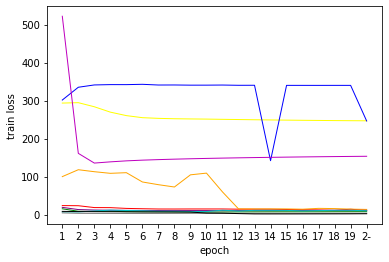

In [104]:
plt.plot(epochs,np.array(relu_onlayer_withoutGlorot_trainloss[0]), color = 'red', linewidth = 1,alpha=1)             
plt.plot(epochs,np.array(relu_onlayer_withoutGlorot_trainloss[1]), color =  'orange', linewidth = 1,alpha=1) 
plt.plot(epochs,np.array(relu_onlayer_withoutGlorot_trainloss[2]), color = 'yellow', linewidth = 1,alpha=1) 
plt.plot(epochs,np.array(relu_onlayer_withoutGlorot_trainloss[3]), color = 'green', linewidth = 1,alpha=1) 
plt.plot(epochs,np.array(relu_onlayer_withoutGlorot_trainloss[4]), color = 'blue', linewidth = 1,alpha=1) 
plt.plot(epochs,np.array(relu_onlayer_withoutGlorot_trainloss[5]), color = 'purple', linewidth = 1,alpha=1) 
plt.plot(epochs,np.array(relu_onlayer_withoutGlorot_trainloss[6]), color = 'c', linewidth = 1,alpha=1) 
plt.plot(epochs,np.array(relu_onlayer_withoutGlorot_trainloss[7]), color = 'grey', linewidth = 1,alpha=1) 
plt.plot(epochs,np.array(relu_onlayer_withoutGlorot_trainloss[8]), color = 'black', linewidth = 1,alpha=1) 
plt.plot(epochs,np.array(relu_onlayer_withoutGlorot_trainloss[9]), color = 'm', linewidth = 1,alpha=1) 
plt.xlabel("epoch")
plt.ylabel("train loss")
plt.show()          

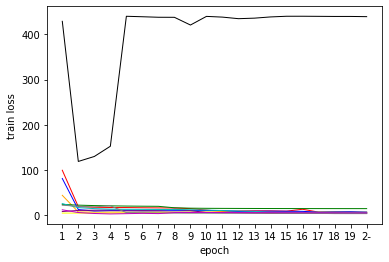

In [105]:
plt.plot(epochs,np.array(original[0]), color = 'red', linewidth = 1,alpha=1)             
plt.plot(epochs,np.array(original[1]), color =  'orange', linewidth = 1,alpha=1) 
plt.plot(epochs,np.array(original[2]), color = 'yellow', linewidth = 1,alpha=1) 
plt.plot(epochs,np.array(original[3]), color = 'green', linewidth = 1,alpha=1) 
plt.plot(epochs,np.array(original[4]), color = 'blue', linewidth = 1,alpha=1) 
plt.plot(epochs,np.array(original[5]), color = 'purple', linewidth = 1,alpha=1) 
plt.plot(epochs,np.array(original[6]), color = 'c', linewidth = 1,alpha=1) 
plt.plot(epochs,np.array(original[7]), color = 'grey', linewidth = 1,alpha=1) 
plt.plot(epochs,np.array(original[8]), color = 'black', linewidth = 1,alpha=1) 
plt.plot(epochs,np.array(original[9]), color = 'm', linewidth = 1,alpha=1) 
plt.xlabel("epoch")
plt.ylabel("train loss")
plt.show() 

## Residual connection, hidden layers, activation functions insight

In [52]:
plt.plot(epochs,sig_onelayer_accuracy, color = 'red', linewidth = 1,alpha=1,label='line1')             
plt.plot(epochs,relu_onelayer_residualconnection_accuracy, color = 'orange', linewidth = 1,alpha=0.5,label='line2') 
plt.plot(epochs,relu_5_layer_residualconnection_accuracy, color = 'yellow', linewidth = 1,alpha=0.5,label='line3')             
plt.plot(epochs,sig_5_layer_residualconnection_accuracy, color = 'green', linewidth = 1,alpha=0.5,label='line4')             
plt.plot(epochs,sig_5_layer_accuracy, color = 'blue', linewidth = 1,alpha=0.5,label='line5')
plt.legend(['sig+onelayer', 'relu+onelayer+residual connection','relu+5layers+residual connection',
            'sig+5layers+residual connection','sig+5layer'])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()  

[99.77174894068588,
 117.96298553020061,
 112.73464009517488,
 108.45644882372602,
 110.15586886033535,
 85.70200445083022,
 78.53694822905814,
 72.45407622577088,
 104.49782711783574,
 108.99538673347864,
 59.5226636263766,
 14.878679598370168,
 14.766451963957103,
 14.7515973656685,
 14.75200673853025,
 14.009254922837812,
 16.230736100113745,
 15.63764324606296,
 14.182887560667211,
 13.426191420289836]